In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(data_scaled, cancer.target,test_size=0.3,random_state=0)

In [4]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf =LogisticRegression()
lr_clf.fit(x_train,y_train)
lr_pred = lr_clf.predict(x_test)

print('accuracy :{:0.3f}'.format(accuracy_score(y_test,lr_pred)))
print('roc_auc :{:0.3f}'.format(roc_auc_score(y_test,lr_pred)))

accuracy :0.977
roc_auc :0.972


In [5]:
solvers = ['lbfgs','liblinear','newton-cg','sag','saga']

for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(x_train,y_train)
    lr_preds = lr_clf.predict(x_test)

    print('solver:{0}, accuracy:{1:.3f},roc_auc{2:.3f}'.format(solver,accuracy_score(y_test,lr_preds),roc_auc_score(y_test,lr_preds)))

solver:lbfgs, accuracy:0.977,roc_auc0.972
solver:liblinear, accuracy:0.982,roc_auc0.979
solver:newton-cg, accuracy:0.977,roc_auc0.972
solver:sag, accuracy:0.982,roc_auc0.979
solver:saga, accuracy:0.982,roc_auc0.979


In [6]:
from sklearn.model_selection import GridSearchCV

params = {'solver' :['liblinear','lbfgs'], 
        'penalty' : ['l1','l2'],
        'C':[0.01, 0.1, 1, 1.1, 5, 10]}

grid_clf = GridSearchCV(lr_clf,param_grid=params, scoring='accuracy',cv=3)
grid_clf.fit(data_scaled,cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


c:\Users\seon\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\seon\.conda\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\seon\.conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\seon\.conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solve

In [22]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

boston = load_boston()
bostonDF = pd.DataFrame(boston.data,columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)



c:\Users\seon\.conda\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [23]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf,x_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5교차 검증의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5교차 검증의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5교차 검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5교차 검증의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5교차 검증의 평균 RMSE : 4.423


In [24]:
def get_model_cv_prediction(model,x_data,y_target):
    neg_mse_scores = cross_val_score(model,x_data,y_target,scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####',model.__class__.__name__,'####')
    print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [26]:
dt_reg = DecisionTreeRegressor(random_state=0,max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0,n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)


In [27]:
models = [dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
    get_model_cv_prediction(model,x_data,y_target)

#### DecisionTreeRegressor ####
5 교차 검증의 평균 RMSE : 5.978
#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE : 4.423
#### GradientBoostingRegressor ####
5 교차 검증의 평균 RMSE : 4.269
#### XGBRegressor ####
5 교차 검증의 평균 RMSE : 4.251
#### LGBMRegressor ####
5 교차 검증의 평균 RMSE : 4.646


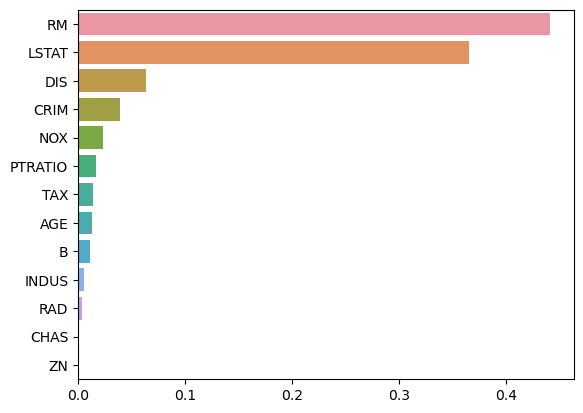

In [30]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(x_data,y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=x_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)


(100, 2)


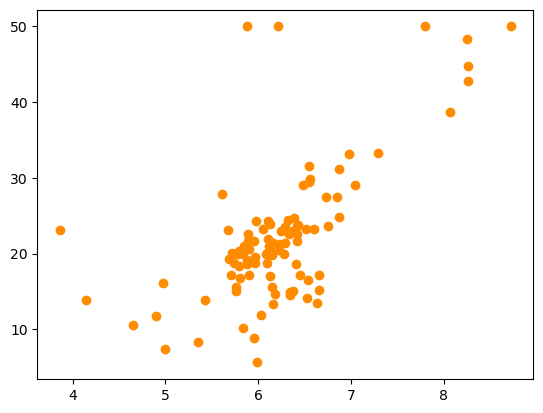

In [32]:
import matplotlib.pyplot as plt

bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

x_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

x_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

In [38]:
lr_reg.fit(x_feature,y_target)
rf_reg2.fit(x_feature,y_target)
rf_reg7.fit(x_feature,y_target)

pred_lr = lr_reg.predict(x_test)
pred_rf2 = rf_reg2.predict(x_test)
pred_rf7 = rf_reg7.predict(x_test)

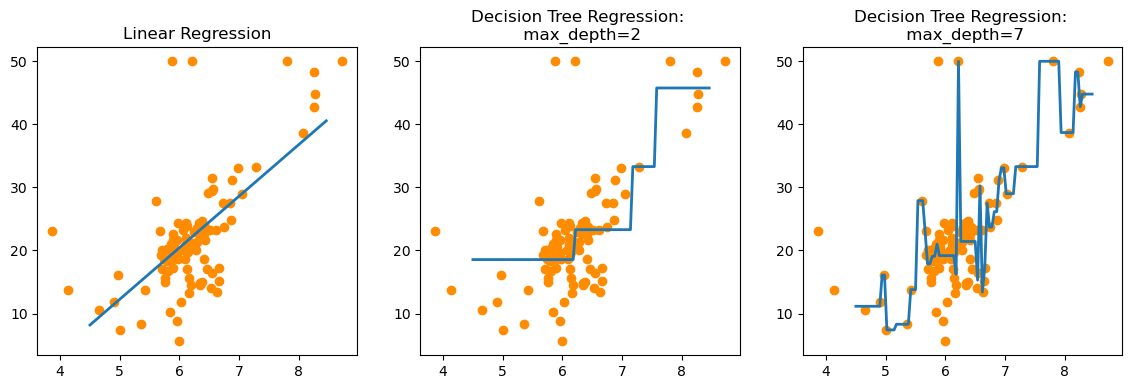

In [42]:
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(14,4),ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(x_test,pred_lr,label='linear',linewidth=2)

ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(x_test,pred_rf2, label='max_depth=3',linewidth=2)

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(x_test,pred_rf7, label='max_depth=7',linewidth=2)
